# Quais fatores que influenciam a venda de um veículo?

A base de dados para análise, trata-se de centenas de anúncios gratuitos de veículos publicados diariamente ao longo de um ano, maio de 2018 a abril de 2019. o objetivo aqui é determinar quais os principais fatores, dentro da base de dados, que influenciam o preço do veículo.

Para atingir esse objetivo, é preciso explorar os dados, cuidar de valores problemáticos, como valores ausentes ou duplicados. Além de criar variáveis e gráficos que facilitem a leitura e compreensão das análises. Tratar os valores atípicos também será imprescindível.

## Introdução

In [1]:
# Bibliotecas
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np
import datetime as dt

# Bibliotecas de plots
import matplotlib.pyplot as plt
import seaborn as sns

# Formatação de estilo
sns.set_style('darkgrid')
sns.set_palette('hls')
sns.set_context("notebook", font_scale = 1.5, rc={"lines.linewidth": 2})

### Dados

In [2]:
# Carregar o arquivo com os dados em um DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')

### Explorando os dados iniciais

As características dos veículos são do momento em que o anúncio foi publicado no site.
O conjunto de dados contém os seguintes campos:
- `price` — preço do veículo.
- `model_year` — ano de fabricação.
- `model` — modelo do veículo.
- `condition` — condição de conservação do veículo.
- `cylinders` — quantidade de cilindros existentes no motor do veículo.
- `fuel` — tipo de combustível utilizado no veículo.
- `odometer` — quilometragem do veículo.
- `transmission` — tipo de transmissão existente no veículo.
- `type` — tipo da carroceria do veículo.
- `paint_color` — cor predominante do veículo.
- `is_4wd` — se o veículo é 4 por 4.
- `date_posted` — data que o anúncio foi publicado.
- `days_listed` — quantidade de dias da publicação a retirada do anúncio.

In [3]:
# Informações gerais/resumidas sobre o DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


In [4]:
# Amostragem dos dados
display(df)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


Temos um DataFrame com 51525 linhas e 13 colunas. 
As seguintes variáveis possuem valores ausentes ou estão com seus tipos classificados de forma errada:
* `model_year`: valores ausentes, seu tipo deve ser datetime.
* `cylinders`: valores ausentes, seu tipo deve ser inteiro.
* `odometer`: valores ausentes, seu tipo deve ser inteiro.
* `paint_color`: valores ausentes.
* `is_4wd`: valores ausentes, seu tipo deve ser booleano.
* `date_posted`: seu tipo deve ser datetime.
* `days_listed`: seu tipo deve ser datetime.

As variáveis `fuel`, `transmission` e `is_4wd` sugerem ser do tipo lógico (boolean), será preciso investigá-las melhor. Tembém é preciso veirificar a existência de duplicatas.

### Existência de duplicatas

In [5]:
# Verificar a existência de duplicatas
df.duplicated().sum()

0

In [6]:
# Verificar a existência de duplicatas implícitas em 'model'
df['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

A variável `model` apresenta duplicatas implícitas em:
* ford f150: ford f-150.
* ford f250: ford f-250.
* ford f250 sd: ford f250 super duty, ford f-250 super duty, ford f-250 sd.
* ford f350: ford f-350.
* ford f350 sd: ford f-350 sd, ford f350 super duty.

In [7]:
# Corrigir duplicatas implícitas
df['model'] = df['model'].replace('ford f-150', 'ford f150')
df['model'] = df['model'].replace('ford f-250', 'ford f250')
df['model'] = df['model'].replace(['ford f250 super duty','ford f-250 super duty', 'ford f-250 sd'], 'ford f250 sd')
df['model'] = df['model'].replace('ford f-350', 'ford f350')
df['model'] = df['model'].replace(['ford f350 super duty','ford f-350 sd'], 'ford f350 sd')

In [8]:
# Verificar a existência de duplicatas implícitas em 'condition'
df['condition'].sort_values().unique()

array(['excellent', 'fair', 'good', 'like new', 'new', 'salvage'],
      dtype=object)

In [9]:
# Verificar a existência de duplicatas implícitas em 'cylinders'
df['cylinders'].sort_values().unique()

array([ 3.,  4.,  5.,  6.,  8., 10., 12., nan])

In [10]:
# Verificar a existência de duplicatas implícitas em 'fuel'
df['fuel'].sort_values().unique()

array(['diesel', 'electric', 'gas', 'hybrid', 'other'], dtype=object)

In [11]:
# Verificar a existência de duplicatas implícitas em 'transmission'
df['transmission'].sort_values().unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [12]:
# Verificar a existência de duplicatas implícitas em 'type'
df['type'].sort_values().unique()

array(['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van',
       'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon'],
      dtype=object)

In [13]:
# Verificar a existência de duplicatas implícitas em 'paint_color'
df['paint_color'].sort_values().unique()

array(['black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange',
       'purple', 'red', 'silver', 'white', 'yellow', nan], dtype=object)

In [14]:
# Verificar a existência de duplicatas implícitas em 'is_4wd'
df['is_4wd'].sort_values().unique()

array([ 1., nan])

Entre todas as variáveis passíveis de duplicatas implícitas, apenas a variável `model` as possuia. Depois da correção, o DataFrame ficou livre de duplicatas. Porém, em `is_4wd` pode-se observar a presença de apenas um valor único, sugerindo que os valores ausentes são os dados 0 (zero) de uma variável lógica (booleana). 

Já as variáveis `fuel` e `transmission` revelam que não são do tipo *bool*, e sim *string*.

### Existência de valores ausentes

In [15]:
# Verificar o percentual de valores ausentes
df.isna().mean()

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

Apenas cinco colunas apresentam valores ausentes. A variável `is_4wd` possui mais de 50% de seus dados ausentes, enquanto a variável `model_year` possui apenas 7% de valores ausentes.

### Conclusões e próximos passos

Com a existência de valores ausentes será necessário uma análise aprofundada para um possível preenchimento desses valores.

O tipo dos dados das variáveis também merecem atenção e serão tratados adiante, uma vez que muitas colunas estão com dados com tipos incorretos.

Uma outra análise que será realizada é o tratamento dos valores atípicos.

## Valores ausentes

As seguintes colunas possuem valores ausentes: `model_year`, `cylinders`, `odometer`, `paint_color` e `is_4wd`.

In [16]:
# Correlação entre as variáveis do DataFrame
print(df.corr())

                price  model_year  cylinders  odometer  is_4wd  days_listed
price        1.000000    0.428656   0.296627 -0.420299     NaN    -0.000682
model_year   0.428656    1.000000  -0.148040 -0.473948     NaN    -0.005703
cylinders    0.296627   -0.148040   1.000000  0.090160     NaN     0.005517
odometer    -0.420299   -0.473948   0.090160  1.000000     NaN     0.003804
is_4wd            NaN         NaN        NaN       NaN     NaN          NaN
days_listed -0.000682   -0.005703   0.005517  0.003804     NaN     1.000000


In [17]:
# Verificar a existência de tendência que justifique os valores ausentes em 'model_year'
print(f'O percentual de valores ausentes na coluna model_year: {df["model_year"].isna().mean():.2%}.')
display(df[df['model_year'].isna()])
print((df[df["model_year"].isna()]["model"].value_counts()/df["model"].value_counts()).sort_values(ascending=False))

O percentual de valores ausentes na coluna model_year: 7.02%.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 sd,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


mercedes-benz benze sprinter 2500    0.170732
gmc yukon                            0.117825
jeep grand cherokee laredo           0.097656
toyota camry le                      0.091772
toyota rav4                          0.091106
                                       ...   
acura tl                             0.050847
chrysler 300                         0.050633
hyundai santa fe                     0.047619
honda odyssey                        0.045952
honda civic lx                       0.041985
Name: model, Length: 95, dtype: float64


In [18]:
# Verificar a mediana dos dados
print(df.groupby(['model'])['model_year'].median())

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 95, dtype: float64


In [19]:
# Substituir os valores ausentes
values_model_year = df.groupby(['model'])['model_year'].transform('median')
df['model_year'].fillna(values_model_year, inplace = True)
df['model_year'].isna().sum()

0

É razoável pensar que algum modelo de veículo esteja dominando os valores ausentes na variável `model_year`. Porém, após análise, não parece existir alguma tendência que justifique a falta de valores na variável que representa o ano do modelo do veículo. Poucos são os modelos de veículos (`model`) que possuem percentual superior a média de valores nulos em `model_year`.

É consenso comum inferir que o modelo do veículo (`model`) inclui algumas características típicas, como a quantidade de cilindros (`cylinders`), o tipo de combustível (`fuel`), o tipo de transmissão (`transmission`) e se o veículo é ou não 4x4 (`is_4wd`). A variável modelo (`model`) é uma forte candidata a ser utilizada para preencher valores ausentes em `model_year`. O preço do veículo (`price`) também sofre enorme influência das características do veículo, bem como o estado de conservação (`condition`) e o ano do modelo (`model_year`).

In [20]:
# Verificar a existência de tendência que justifique os valores ausentes em 'cylinders'
print(f'O percentual de valores ausentes na coluna cylinders: {df["cylinders"].isna().mean():.2%}.')
display(df[df['cylinders'].isna()])
print((df[df["cylinders"].isna()]["model"].value_counts()/df["model"].value_counts()).sort_values(ascending=False))

O percentual de valores ausentes na coluna cylinders: 10.21%.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


mercedes-benz benze sprinter 2500    0.170732
nissan murano                        0.140426
subaru impreza                       0.140000
jeep grand cherokee laredo           0.132812
kia soul                             0.131805
                                       ...   
dodge dakota                         0.074380
nissan rogue                         0.070362
gmc sierra                           0.069588
ford f150 supercrew cab xlt          0.061162
bmw x5                               0.059925
Name: model, Length: 95, dtype: float64


In [21]:
# Verificar a mediana dos dados
print(df.groupby(['model'])['cylinders'].median())

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 95, dtype: float64


In [22]:
# Substituir os valores ausentes
values_cylinders = df.groupby(['model'])['cylinders'].transform('median')
df['cylinders'].fillna(values_cylinders, inplace = True)
df['cylinders'].isna().sum()

0

Mais uma vez, utiliza-se o modelo dos veículos para preencher os valores ausentes em `cylinders`, uma vez que os modelos determinam a fabricação e características do motor, como por exemplo a quantidade de cilindros.

In [23]:
# Verificar a existência de tendência que justifique os valores ausentes em 'odometer'
print(f'O percentual de valores ausentes na coluna odometer: {df["odometer"].isna().mean():.2%}.')
display(df[df['odometer'].isna()])
print((df[df["odometer"].isna()]["model"].value_counts()/df["model"].value_counts()).sort_values(ascending=False))

O percentual de valores ausentes na coluna odometer: 15.32%.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


mercedes-benz benze sprinter 2500    1.000000
kia sorento                          0.190678
nissan maxima                        0.190476
nissan versa                         0.189781
ford escape                          0.185493
                                       ...   
ford econoline                       0.125000
honda cr-v                           0.118248
jeep cherokee                        0.116041
dodge dakota                         0.107438
chevrolet camaro                     0.106280
Name: model, Length: 95, dtype: float64


In [24]:
# Verificar a mediana dos dados
print(df.groupby(['condition'])['odometer'].median())

condition
excellent    104230.0
fair         181613.0
good         129000.0
like new      72982.5
new            8002.0
salvage      142673.5
Name: odometer, dtype: float64


In [25]:
# Substituir os valores ausentes
values_odometer = df.groupby(['condition'])['odometer'].transform('median')
df['odometer'].fillna(values_odometer, inplace = True)
df['odometer'].isna().sum()

0

Entende-se que a conservação do veículo revela o estado de preservação e, consequentemente, o nível de desgaste que o veículo sofreu ao longo dos anos. Um dos maiores fatores que afetam a depreciação do veículo é a quilometragem, uma vez que grandes quantidades de distâncias percorridas por um veículo ocasiona a entropia nas peças e acessórios do carro. 

Logo, um veículo com baixa quilometragem mantém seu estado de "novo" por mais tempo, enquanto um veículo com alta quilometragem está sujeito aos danos ocasionados pela depreciação. Assim, utiliza-se a variável `condition` para preencher os valores ausentes em `odometer`.

In [26]:
# Verificar a existência de tendência que justifique os valores ausentes em 'paint_color'
print(f'O percentual de valores ausentes na coluna paint_color: {df["paint_color"].isna().mean():.2%}.')
display(df[df['paint_color'].isna()])
print((df[df["paint_color"].isna()]["model"].value_counts()/df["model"].value_counts()).sort_values(ascending=False))

O percentual de valores ausentes na coluna paint_color: 17.99%.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f150,fair,8.0,gas,181613.0,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,104230.0,automatic,coupe,NaN,NaN,2018-11-24,89


chevrolet silverado 1500 crew    0.234323
nissan murano                    0.221277
bmw x5                           0.217228
chevrolet camaro lt coupe 2d     0.212219
ford f150 supercrew cab xlt      0.211009
                                   ...   
gmc sierra                       0.149485
nissan frontier                  0.145907
chevrolet silverado 3500hd       0.144033
chrysler 200                     0.144033
chevrolet trailblazer            0.137255
Name: model, Length: 95, dtype: float64


In [27]:
# Verificar a moda dos dados
print(df.groupby(['model'])['paint_color'].agg(pd.Series.mode))

model
acura tl               grey
bmw x5                black
buick enclave         white
cadillac escalade     black
chevrolet camaro        red
                      ...  
toyota sienna        silver
toyota tacoma         white
toyota tundra         white
volkswagen jetta     silver
volkswagen passat     black
Name: paint_color, Length: 95, dtype: object


In [28]:
# Substituir os valores ausentes
values_paint_color = df.groupby(['model'])['paint_color'].transform(lambda x : x.mode()[0])
df['paint_color'].fillna(values_paint_color, inplace = True)
df['paint_color'].isna().sum()

0

O preenchimento dos valores nulos dessa variável é o mais complexo, uma vez que os mesmos modelos de carros podem ter variadas cores, sem falar que os proprietários podem alterar a cor original que sai com a fabricação do modelo do carro.

Nesse sentido, e de forma a não precisar excluir quase 18% das linhas do DataFrame ou excluir a coluna `paint_color`, ou até mesmo definir como *unknown* os valores ausentes, utiliza-se um preenchimento baseado na cor do modelo do carro que mais aparece entre as cores do modelo daquele veículo — com maior frequência absoluta (moda).

Poderíamos pensar que bastava a exclusão da coluna `paint_color` para continuar a análise, ou qualquer umas das saídas sugeridas acima, porém, conforme estudo realizado pela *IseeCars* em 2022, a cor do carro usado influência no preço de venda. Então, segundo o estudo, carros com cores mais tradicionais são mais procurados, assim afetando o preço da venda pela demanda produzida por aquela cor, em contrapartida carros com cores mais exóticas e diferentes sofrem com dificuldades no pós-venda.

In [29]:
# Verificar a existência de tendência que justifique os valores ausentes em 'is_4wd'
print(f'O percentual de valores ausentes na coluna is_4wd: {df["is_4wd"].isna().mean():.2%}.')
display(df[df['is_4wd'].isna()])
print(df["is_4wd"].unique())

O percentual de valores ausentes na coluna is_4wd: 50.37%.


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f150,fair,8.0,gas,181613.0,automatic,pickup,white,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


[ 1. nan]


In [30]:
# Substituir os valores ausentes
df['is_4wd'].fillna(0, inplace = True)
df['is_4wd'].isna().sum()

0

A variável `is_4wd` é do tipo *boolean* e assume apenas valores 1 (o veículo é um 4x4), ou 0 (o veículo não é um 4x4). Desse modo, entende-se que todos os valores ausentes dessa variável devam ser substituídos por 0 (zero).

In [31]:
# Verificar valores ausentes
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Tipos de dados

Segue-se com a alteração do tipo dos dados das variáveis:
* `model_year` — data.
* `cylinders` — apenas pode assumir valores inteiros positivos.
* `odometer` — apenas pode assumir valores inteiros positivos.
* `is_4wd` — variável lógica de presença ou ausência de característica.
* `date_posted` — data.

In [32]:
# Alterar o tipo das variáveis
df['model_year'] = pd.to_datetime(arg=df['model_year'], format="%Y")
df['cylinders'] = df['cylinders'].astype('int')
df['odometer'] = df['odometer'].astype('int')
df['is_4wd'] = df['is_4wd'].astype('bool')
df['date_posted'] = pd.to_datetime(arg=df['date_posted'], format="%Y-%m-%d")

## Melhorando os dados

Faz-se necessário a criação de novas variáveis para facilitar a manipulação dos dados e resoluções de problemas.

In [33]:
# Adicionar coluna de 'week_day', 'month' e 'year' quando da postagem do anúncio
df['year_posted'] = df['date_posted'].dt.year
df['month_posted'] = df['date_posted'].dt.month
df['week_day_posted'] = df['date_posted'].dt.day_name()

In [34]:
# Adicionar a idade do veículo, em anos, quando da postagem do anúncio
df['vehicle_age_year'] = (df['date_posted']-df['model_year'])/pd.Timedelta(days=365)

# Evitar a divisão por zero
for age in df['vehicle_age_year']:
    if age==0:
        df['vehicle_age_year'] = df['vehicle_age_year']+0.00001
    else:
        df['vehicle_age_year'] = df['vehicle_age_year']

In [35]:
# Adicionar a quilometragem média por ano
df['odometer_year'] = (df['odometer']/df['vehicle_age_year']).round()
df['odometer_year'] = df['odometer_year'].astype('int')

In [36]:
# Função para substituir os valores em 'condition' por categorias numéricas ordenadas
def condition_categorical(condition):
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    elif condition == 'salvage':
        return 0

In [37]:
# Substituir valores em 'condition'
df['condition'] = df['condition'].apply(condition_categorical)
df['condition'] = df['condition'].astype('str')

## Dados limpos

Agora com os dados limpos, é importante ver o que temos para realizar as análises futuras.

In [38]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  datetime64[ns]
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  int64         
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  year_posted       51525 non-null  int64         
 14  month_posted      5152

In [39]:
# imprima uma amostragem dos dados
display(df)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,week_day_posted,vehicle_age_year,odometer_year
0,9400,2011-01-01,bmw x5,2,6,gas,145000,automatic,SUV,black,True,2018-06-23,19,2018,6,Saturday,7.479462,19386
1,25500,2011-01-01,ford f150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,Friday,7.802750,11368
2,5500,2013-01-01,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,Thursday,6.104120,18021
3,1500,2003-01-01,ford f150,1,8,gas,181613,automatic,pickup,white,False,2019-03-22,9,2019,3,Friday,16.230147,11190
4,14900,2017-01-01,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,Tuesday,2.249325,35968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013-01-01,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2018,10,Wednesday,5.756174,15312
51521,2700,2002-01-01,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2018,11,Wednesday,16.879462,10753
51522,3950,2009-01-01,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,2018,11,Thursday,9.876722,12960
51523,7455,2013-01-01,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,2018,7,Monday,5.501380,25371


## Parâmetros fundamentais

Para visualizar os parâmetros a seguir, utiliza-se de gráficos de contagem e de quartis, histogramas e boxplots.

Os parâmetros são:
- Preço: `price`.
- A idade do veículo quando a propaganda foi colocada: `vehicle_age_year`.
- Quilometragem: `odometer`.
- Número de cilindros: `cylinders`.
- Condição: `condition`.

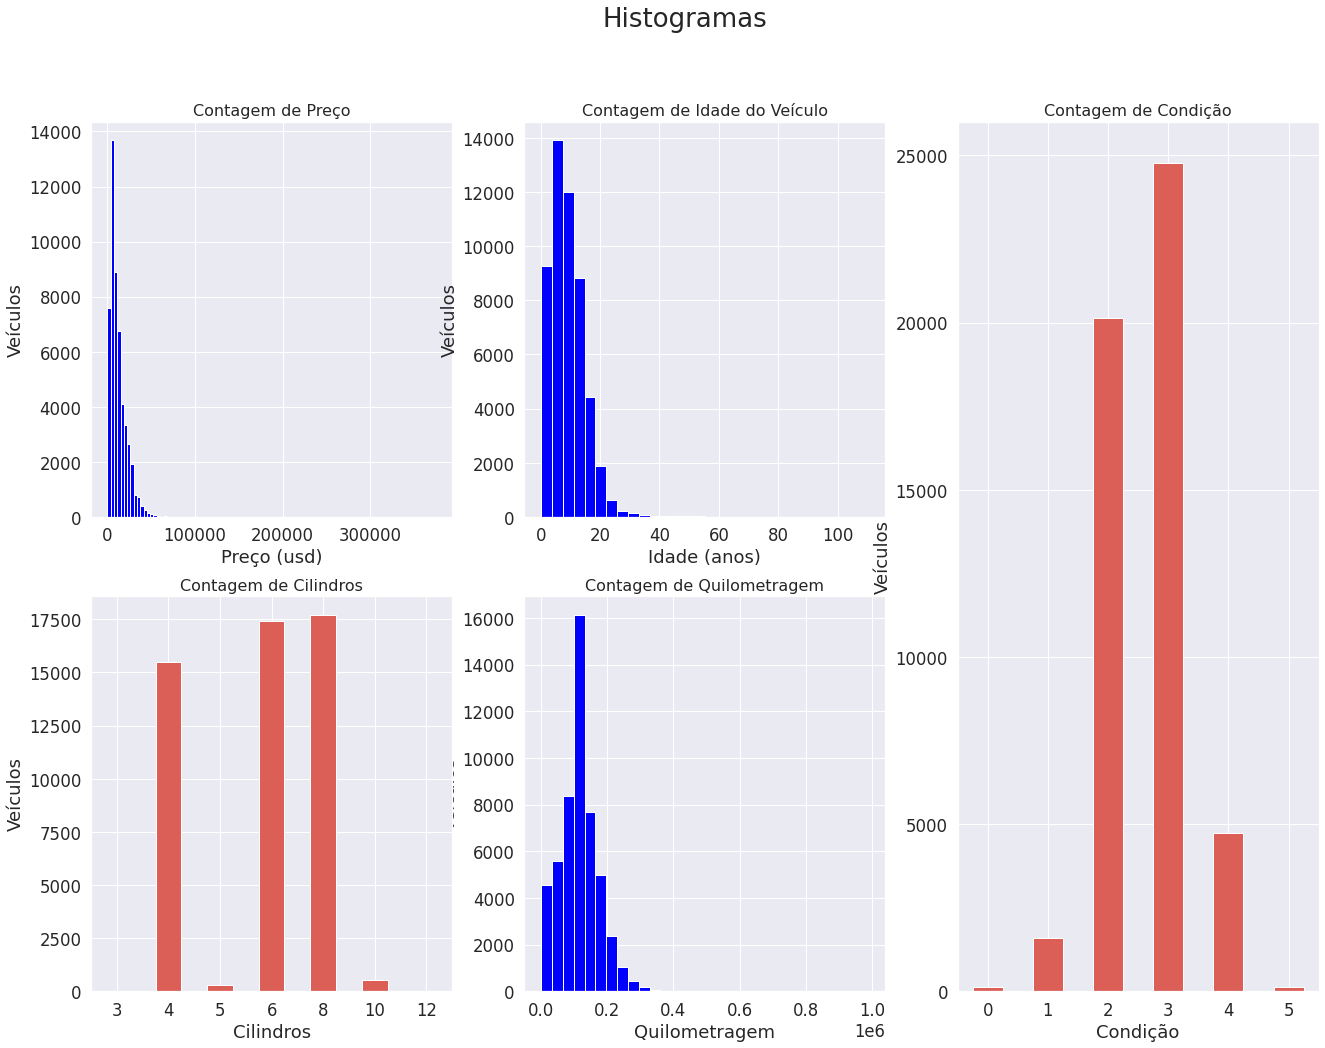

In [67]:
# Histograma dos parâmetros
plt.figure(figsize = ((22, 16)))
plt.suptitle("Histogramas", fontsize = 26)
# Parâmetro 'price'
plt.subplot(2, 3, 1)
plt.hist(df['price'], bins=100, color='b')
plt.title("Contagem de Preço", fontsize = 16)
plt.ylabel('Veículos')
plt.xlabel('Preço (usd)')
# Parâmetro 'vehicle_age_year'
plt.subplot(2, 3, 2)
plt.hist(df['vehicle_age_year'], bins=30, color='b')
plt.title('Contagem de Idade do Veículo', fontsize = 16)
plt.ylabel('Veículos')
plt.xlabel('Idade (anos)')
# Parâmetro 'odometer'
plt.subplot(2, 3, 5)
plt.hist(df['odometer'], bins=30, color='b')
plt.title('Contagem de Quilometragem', fontsize = 16)
plt.ylabel('Veículos')
plt.xlabel('Quilometragem');
# Parâmetro 'cylinders'
plt.subplot(2, 3, 4)
df.groupby('cylinders')['model'].count().plot(kind='bar')
plt.title('Contagem de Cilindros', fontsize = 16)
plt.ylabel('Veículos')
plt.xticks(rotation = 0)
plt.xlabel('Cilindros');
# Parâmetro 'condition'
plt.subplot(1, 3, 3)
df.groupby('condition')['model'].count().plot(kind='bar')
plt.title(f'Contagem de Condição', fontsize = 16)
plt.ylabel('Veículos')
plt.xlabel('Condição')
plt.xticks(rotation = 0);

plt.show()

Os histogramas acima revelam valores atípicos nas variáveis `price`, `odometer` e `vehicle_age_year`, variáveis com barras em azul. A seguir identifica-se esses valores atípicos, remove-os e cria-se uma DataFrame com os dados filtrados.

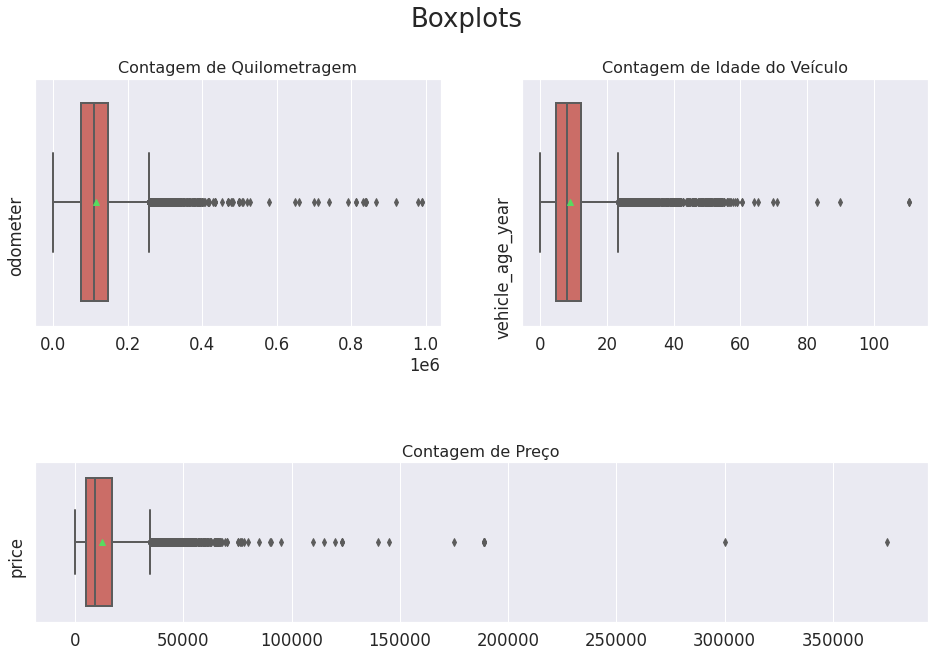

In [41]:
# Boxplot dos parâmetros
plt.figure(figsize = ((16, 10)))
plt.suptitle("Boxplots", fontsize = 26)
# Parâmetro 'price'
plt.subplot(3, 1, 3)
sns.boxplot(data=df[["price"]], orient="h", showmeans=True);
plt.title(f'Contagem de Preço', fontsize = 16)
plt.yticks(rotation = 90)
plt.subplot(2, 2, 1)
sns.boxplot(data=df[["odometer"]], orient="h", showmeans=True);
plt.title(f'Contagem de Quilometragem', fontsize = 16)
plt.yticks(rotation = 90)
plt.subplot(2, 2, 2)
sns.boxplot(data=df[["vehicle_age_year"]], orient="h", showmeans=True);
plt.title(f'Contagem de Idade do Veículo', fontsize = 16)
plt.yticks(rotation = 90)
plt.show()

## Valores atípicos

Uma das melhores formas de encontrar os valores atípicos é observar os valores mínimos e máximos através do intervalo interquartil (IQR). Sua fórmula é: IQR = 3Q - 1Q.

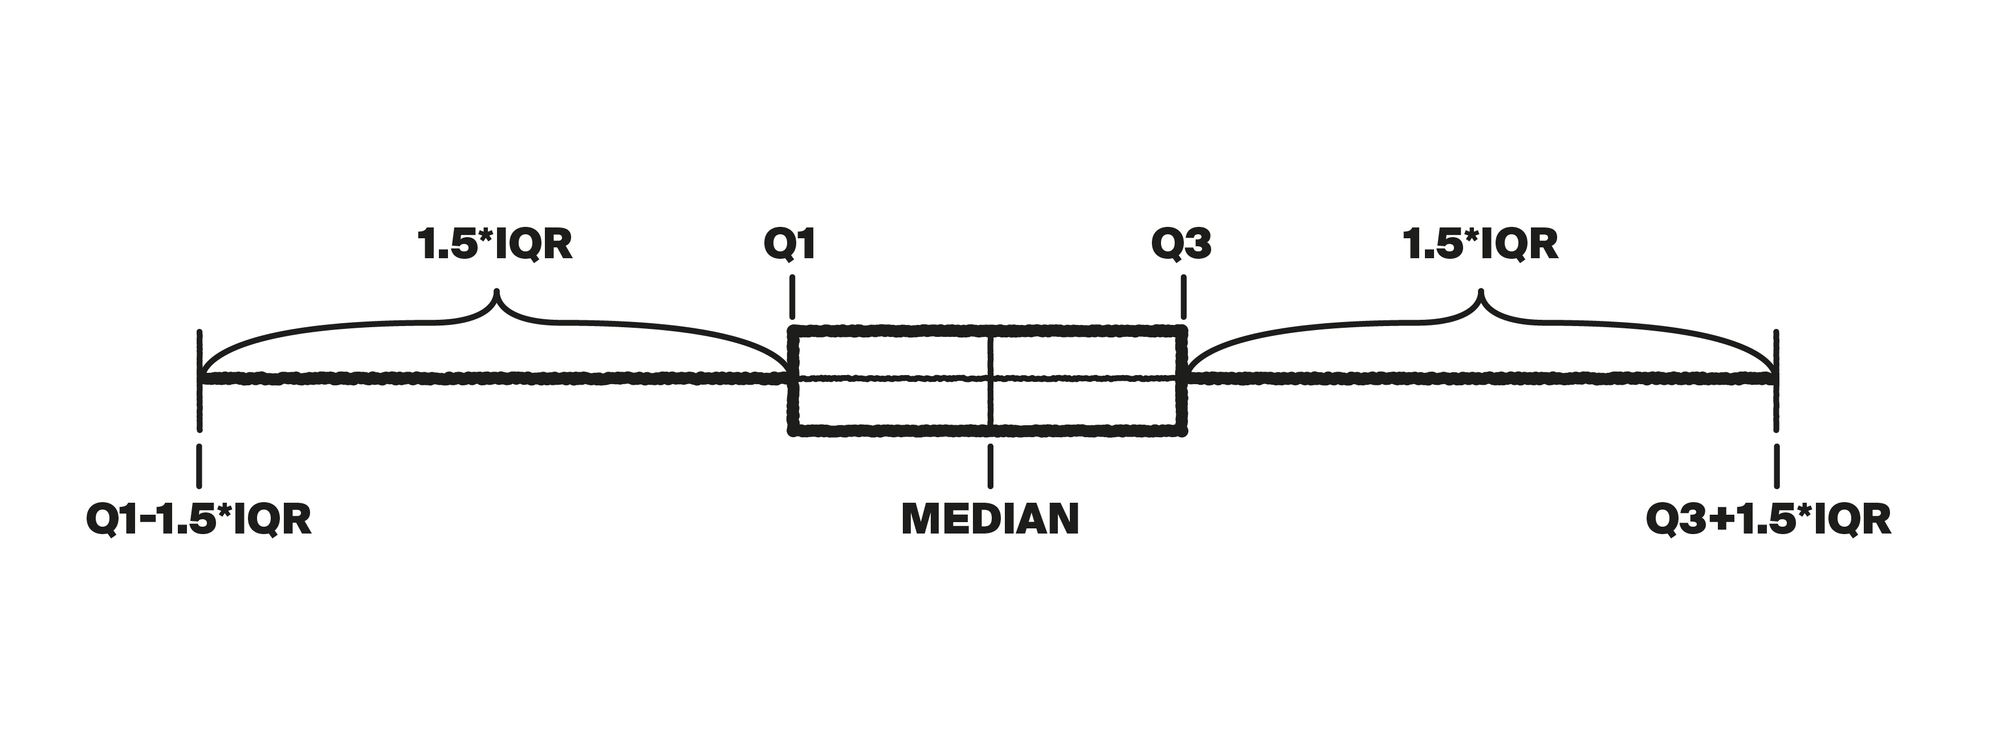

In [42]:
# Calcular IQR das variáveis
IQR_price = (df['price'].quantile(0.75))-(df['price'].quantile(0.25))
IQR_vehicle_age_year = (df['vehicle_age_year'].quantile(0.75))-(df['vehicle_age_year'].quantile(0.25))
IQR_odometer = (df['odometer'].quantile(0.75))-(df['odometer'].quantile(0.25))

In [43]:
# Determinar o limite inferior para valores atípicos
price_min = df['price'].quantile(0.25)-1.5*IQR_price
vehicle_age_year_min = df['vehicle_age_year'].quantile(0.25)-1.5*IQR_vehicle_age_year
odometer_min = df['odometer'].quantile(0.25)-1.5*IQR_odometer

print(f'O preço dos veículos possuem um limite inferior de {price_min} dólares. A idade dos veículos até o anúncio ser postado tem limite inferior de {vehicle_age_year_min:.2} anos. O limite inferior da quilometragem dos veículos é {odometer_min}km.')

O preço dos veículos possuem um limite inferior de -12758.5 dólares. A idade dos veículos até o anúncio ser postado tem limite inferior de -6.5 anos. O limite inferior da quilometragem dos veículos é -32561.5km.


Como os valores do limite inferior são negativos e não há possibilidade dessas variáveis assumirem valores negativos, pode-se afirmar que não há valores extremos/atípicos inferior.

In [44]:
# Determinar o limite superior para valores atípicos
price_max = df['price'].quantile(0.75)+1.5*IQR_price
vehicle_age_year_max = df['vehicle_age_year'].quantile(0.75)+1.5*IQR_vehicle_age_year
odometer_max = df['odometer'].quantile(0.75)+1.5*IQR_odometer

print(f'O preço dos veículos possuem um limite superior de {price_max} dólares. A idade dos veículos até o anúncio ser postado tem limite superior de {vehicle_age_year_max:.3} anos. O limite superior da quilometragem dos veículos é {odometer_max}km.')

O preço dos veículos possuem um limite superior de 34597.5 dólares. A idade dos veículos até o anúncio ser postado tem limite superior de 23.4 anos. O limite superior da quilometragem dos veículos é 256050.5km.


In [45]:
# Armazenar os dados sem os valores atípicos em um DataFrame separado
df_standard = df.query('(price<@price_max) and (vehicle_age_year<@vehicle_age_year_max) and (odometer<@odometer_max)')

In [46]:
# Tamanho do DataFrame
print(f'O DataFrame filtrado df_standard possui {(len(df_standard)/len(df)):.2%} do Dataframe original, df.')

O DataFrame filtrado df_standard possui 93.26% do Dataframe original, df.


## Parâmetros fundamentais sem valores atípicos

Com o novo DataFrame filtrado sem os valores atípicos, faz-se necessário criar novamente os gráficos e comparar com os gráficos anteriores.

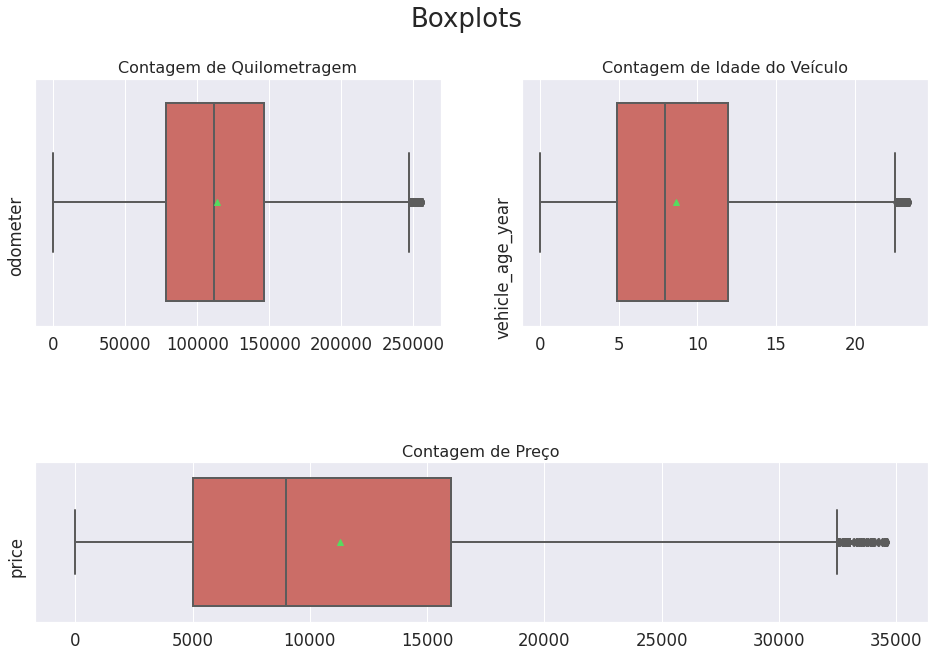

In [47]:
# Boxplot dos parâmetros sem valores atípicos
plt.figure(figsize = ((16, 10)))
plt.suptitle("Boxplots", fontsize = 26)
# Parâmetro 'price'
plt.subplot(3, 1, 3)
sns.boxplot(data=df_standard[["price"]], orient="h", showmeans=True);
plt.title(f'Contagem de Preço', fontsize = 16)
plt.yticks(rotation = 90)
plt.subplot(2, 2, 1)
sns.boxplot(data=df_standard[["odometer"]], orient="h", showmeans=True);
plt.title(f'Contagem de Quilometragem', fontsize = 16)
plt.yticks(rotation = 90)
plt.subplot(2, 2, 2)
sns.boxplot(data=df_standard[["vehicle_age_year"]], orient="h", showmeans=True);
plt.title(f'Contagem de Idade do Veículo', fontsize = 16)
plt.yticks(rotation = 90)
plt.show()

Ao realizar o gráfico de caixa, torna-se nítida a diferença com o boxplot do DataFrame original, com valores extremos. Agora há menos valores atípicos no limite superior, além das caixas dos gráficos, intervalo entre o quartis Q1 e Q3, serem mais visíveis com escalas mais suaves.

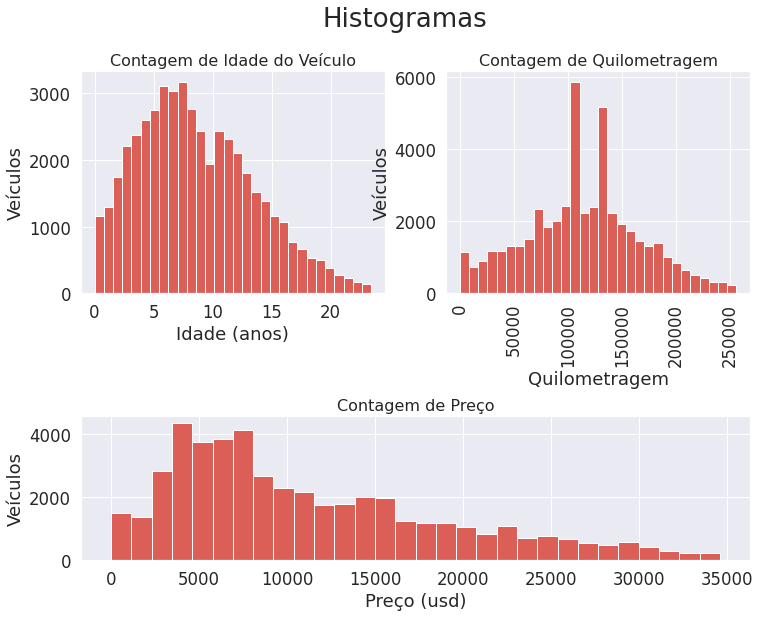

In [48]:
# Histograma dos parâmetros sem valores atípicos
plt.figure(figsize = ((12, 9)))
plt.suptitle("Histogramas", fontsize = 26)
# Parâmetro 'price'
plt.subplot(3, 1, 3)
plt.hist(df_standard['price'], bins=30)
plt.title("Contagem de Preço", fontsize = 16)
plt.ylabel('Veículos')
plt.xlabel('Preço (usd)')
# Parâmetro 'vehicle_age_year'
plt.subplot(2, 2, 1)
plt.hist(df_standard['vehicle_age_year'], bins=30)
plt.title('Contagem de Idade do Veículo', fontsize = 16)
plt.ylabel('Veículos')
plt.xlabel('Idade (anos)')
# Parâmetro 'odometer'
plt.subplot(2, 2, 2)
plt.hist(df_standard['odometer'], bins=30)
plt.title('Contagem de Quilometragem', fontsize = 16)
plt.ylabel('Veículos')
plt.xticks(rotation = 90)
plt.xlabel('Quilometragem');

plt.show()

Com o gráfico de histograma não seria diferente, com escalas menores há a possibilidade de ver o comportamento da distribuição das variáveis analisadas. A seguir, temos os histogramas dos dois Dataframes sobrepostos.

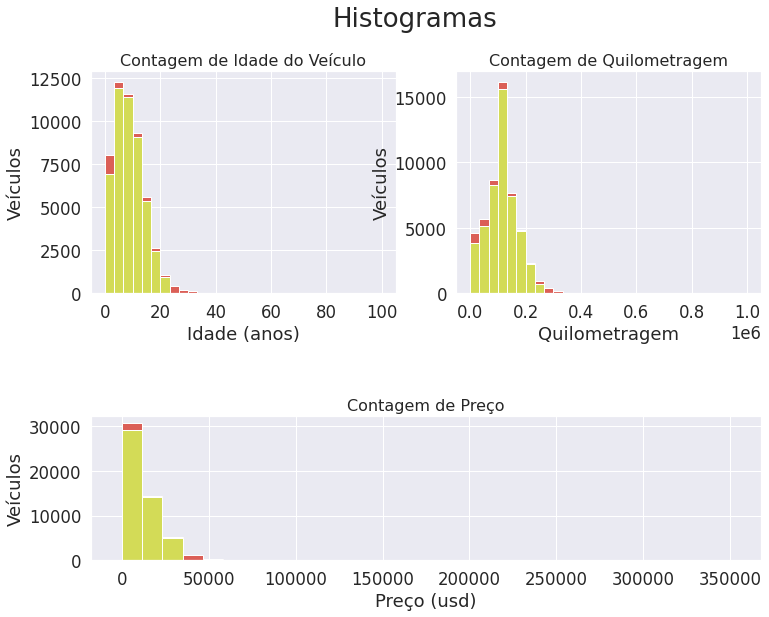

In [49]:
# Histograma dos parâmetros dos DataFrames sobrepostos
plt.figure(figsize = ((12, 9)))
plt.suptitle("Histogramas", fontsize = 26)
# Parâmetro 'price'
plt.subplot(3, 1, 3)
plt.hist(df['price'], bins=30, range=(0,350000))
plt.hist(df_standard['price'], bins=30, range=(0,350000))
plt.title("Contagem de Preço", fontsize = 16)
plt.ylabel('Veículos')
plt.xlabel('Preço (usd)')
# Parâmetro 'vehicle_age_year'
plt.subplot(2, 2, 1)
plt.hist(df['vehicle_age_year'], bins=30, range=(0,100))
plt.hist(df_standard['vehicle_age_year'], bins=30, range=(0,100))
plt.title('Contagem de Idade do Veículo', fontsize = 16)
plt.ylabel('Veículos')
plt.xlabel('Idade (anos)')
# Parâmetro 'odometer'
plt.subplot(2, 2, 2)
plt.hist(df['odometer'], bins=30, range=(0,1000000))
plt.hist(df_standard['odometer'], bins=30, range=(0,1000000))
plt.title('Contagem de Quilometragem', fontsize = 16)
plt.ylabel('Veículos')
plt.xlabel('Quilometragem');

plt.show()

Com esse gráfico acima, podemos perceber a sutil diferença entre os DataFrames mesmo estando na mesma escala.
Enquanto a idade dos veículos anunciados atingem seu limite superior logo após 20 anos, a quilometragem dos veículos do anúncio não costumam ultrapassar os 250000km. O limite superior dos preços dos veículos nos anúncios não costumam ultrapassar os 35 mil dólares.

## Tempo de vida das propagandas

Verifica-se a seguir, a quantidade média de dias da duração de um anúncio na plataforma. Também conseguimos analisar os anúncios que foram removidos rapidamente e os que foram listados por um tempo anormalmente longo.

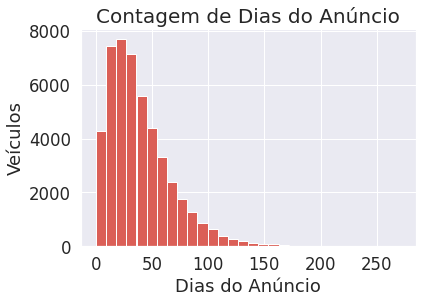

In [50]:
# Parâmetro 'days_listed'
plt.figure(figsize = ((6, 4)))
plt.hist(df_standard['days_listed'], bins=30)
plt.title('Contagem de Dias do Anúncio', fontsize = 20)
plt.ylabel('Veículos')
plt.xlabel('Dias do Anúncio');

O histograma acima revela anúncios que passam enormes quantidades de tempo até serem removidos, indicados pela calda longa à direita.

In [51]:
# Tempo de exibição médio dos anúncios
listed_mean = df_standard['days_listed'].mean()
listed_median = df_standard['days_listed'].median()
print(f'Em média as propagandas ficam por {listed_mean:.3} dias até serem removidas.\
 Por outro lado, 50% das propagandas são removidas em até {listed_median:.3} dias após suas postagens.')

Em média as propagandas ficam por 39.5 dias até serem removidas. Por outro lado, 50% das propagandas são removidas em até 33.0 dias após suas postagens.


In [52]:
# Cálculo do IQR da variável 'days_listed'
Q1_days = df_standard['days_listed'].quantile(0.25)
Q3_days = df_standard['days_listed'].quantile(0.75)
IQR_days = Q3_days - Q1_days

O limite superior do tempo, em dias, que o anúncio fica disponível até ser removido é de 104.0 dias.
O limite inferior do tempo, em dias, que o anúncio fica disponível até ser removido é de -32.0 dias, porém essa variável só assume valores positivos.


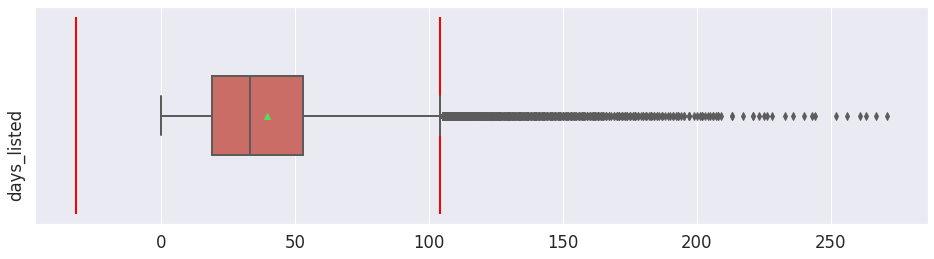

In [53]:
# Bloxpot de 'days_listed'
plt.figure(figsize = ((16, 4)))
sns.boxplot(data=df_standard[['days_listed']], orient='h', showmeans=True);
plt.vlines(x=[Q1_days-1.5*IQR_days, Q3_days+1.5*IQR_days], ymin=-1, ymax=1, color='red')
plt.yticks(rotation = 90)
print(f'O limite superior do tempo, em dias, que o anúncio fica disponível até ser removido é de {Q3_days+1.5*IQR_days} dias.');
print(f'O limite inferior do tempo, em dias, que o anúncio fica disponível até ser removido é de {Q1_days-1.5*IQR_days} dias, porém essa variável só assume valores positivos.');

216 anúncios foram removidos em até 1 dia após sua publicação.


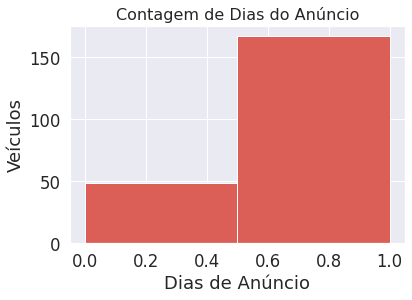

In [54]:
# Anúncios que foram removidos rapidamente, mesmo dia ou no dia seguinte
df_listed_fast = df_standard.query('-1 <days_listed < 2')
df_listed_fast.hist('days_listed', bins=2)
plt.title('Contagem de Dias do Anúncio', fontsize = 16)
plt.ylabel('Veículos')
plt.xlabel('Dias de Anúncio');
len_fast = len(df_standard[df_standard['days_listed']<=1])
print(f'{len_fast} anúncios foram removidos em até 1 dia após sua publicação.');

In [55]:
# Contagem, média e mediana do tipo de veículos com anúncios rápidos
display(df_listed_fast.pivot_table(index=['type', 'condition'], values='days_listed', aggfunc=['count','mean', 'median']))

count        mean      median
                      days_listed days_listed days_listed
type        condition                                    
SUV         1                   2    1.000000         1.0
            2                  15    0.866667         1.0
            3                  25    0.840000         1.0
            4                   5    0.800000         1.0
convertible 2                   1    0.000000         0.0
            3                   1    1.000000         1.0
coupe       1                   1    0.000000         0.0
            2                   5    0.800000         1.0
hatchback   1                   1    0.000000         0.0
            2                   2    0.500000         0.5
            3                   5    0.800000         1.0
mini-van    2                   1    0.000000         0.0
            4                   2    0.500000         0.5
offroad     2                   1    1.000000         1.0
            3                   1    1.000000         1.0
pickup      1                   1    0.000000         0.0
            2                  15    0.866667         1.0
            3                  14    0.785714         1.0
            4                   1    1.000000         1.0
sedan       2                  17    0.764706         1.0
            3                  23    0.739130         1.0
            4                   8    0.750000         1.0
truck       2                  23    0.695652         1.0
            3                  20    0.700000         1.0
            4                   7    1.000000         1.0
van         2                   1    1.000000         1.0
            3                   2    0.500000         0.5
            4                   3    0.333333         0.0
wagon       0                   1    1.000000         1.0
            1                   1    1.000000         1.0
            2                   4    1.000000         1.0
            3                   7    1.000000         1.0

Os tipos de veículos (`type`) que dominaram a rápida remoção de seus anúncios foram os do tipo *truck*, *sedan*, *SUV* e *pickup*. Sugerindo uma preferência dos consumidores para essas categorias de veículos, considerando que os dados sejam uma amostra significativa dos hábitos de consumo local.

46544 anúncios só foram removidos após passarem, no mínimo, 104.0 dias depois de suas publicações.


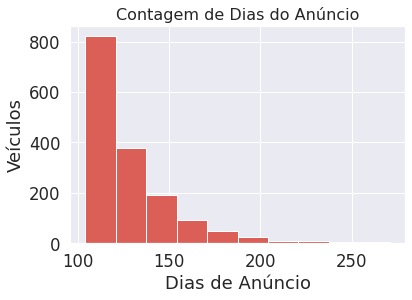

In [56]:
# Anúncios listados por um tempo anormalmente longo
tlong = Q3_days+1.5*IQR_days
df_listed_tlong = df_standard.query('days_listed >= @tlong')

df_listed_tlong.hist('days_listed')
plt.title('Contagem de Dias do Anúncio', fontsize = 16)
plt.ylabel('Veículos')
plt.xlabel('Dias de Anúncio');
len_tlong = len(df_standard[df_standard['days_listed']<=tlong])
print(f'{len_tlong} anúncios só foram removidos após passarem, no mínimo, {tlong} dias depois de suas publicações.');

In [57]:
# Contagem, média e mediana do tipo de veículos com anúncios demorados
display(df_listed_tlong.pivot_table(index=['type','condition'], values='days_listed', aggfunc=['count','mean', 'median']))

count        mean      median
                      days_listed days_listed days_listed
type        condition                                    
SUV         0                   1  134.000000       134.0
            1                   9  123.666667       116.0
            2                 150  127.513333       121.0
            3                 219  124.835616       119.0
            4                  30  127.933333       116.0
convertible 2                   4  114.750000       111.5
            3                   4  134.000000       124.5
coupe       1                   3  156.333333       151.0
            2                  35  125.257143       119.0
            3                  30  137.200000       125.5
            4                   4  136.750000       125.0
hatchback   2                   3  121.000000       121.0
            3                  24  139.666667       123.5
            4                   5  113.000000       109.0
mini-van    1                   1  130.000000       130.0
            2                  19  121.263158       116.0
            3                  25  124.400000       116.0
            4                   2  138.500000       138.5
offroad     2                   4  154.250000       136.5
            3                   2  124.000000       124.0
            4                   2  137.000000       137.0
other       2                   1  122.000000       122.0
            3                   4  128.750000       130.0
pickup      1                   4  119.000000       118.0
            2                  75  128.266667       120.0
            3                  94  127.074468       118.0
            4                  12  121.166667       119.0
sedan       0                   2  110.500000       110.5
            1                  11  128.636364       120.0
            2                 138  129.666667       120.0
            3                 205  125.400000       117.0
            4                  37  130.540541       114.0
            5                   1  107.000000       107.0
truck       1                   6  120.000000       122.5
            2                 143  129.279720       121.0
            3                 160  123.300000       118.0
            4                  26  129.884615       121.0
van         2                  15  131.466667       122.0
            3                   7  135.857143       127.0
            4                   5  135.200000       125.0
wagon       2                  25  128.560000       118.0
            3                  33  135.545455       122.0
            4                   2  134.500000       134.5

Os tipos de veículos (type) que mais demoraram a terem a remoção de seus anúncios, também foram os mesmos que tiveram seus anúncios removidos rapidamentedo (truck, sedan, SUV e pickup). Sugerindo, desse modo, que outras características são responsáveis pela preferência dos consumidores em comprarem rápido ou não essas categorias de veículos, variáveis como o preço, quilometragem ou estado de conservação.

type,sedan,SUV,truck,pickup,coupe,wagon,mini-van,hatchback,van,convertible,other,offroad,bus
days_listed,11991,11848,11007,6213,1997,1500,1141,1004,578,337,233,180,21


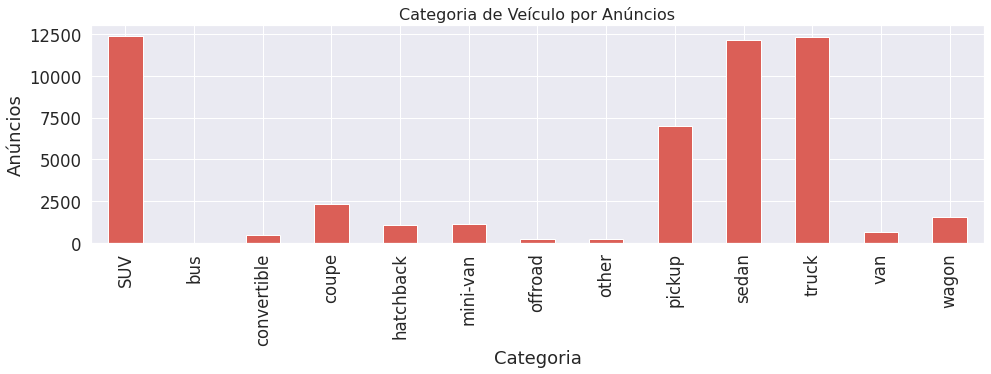

In [58]:
# Tipos de veículos com a maior quantidade de anúncios
display(df_standard.pivot_table(index='type', values='days_listed', aggfunc='count').sort_values(by=['days_listed'], ascending=False).T)

# Gráfico do parâmetro 'type'
plt.figure(figsize = ((16, 4)))
df.groupby('type')['days_listed'].count().plot(kind='bar')
plt.title(f'Categoria de Veículo por Anúncios', fontsize = 16)
plt.ylabel('Anúncios')
plt.xlabel('Categoria')
plt.xticks(rotation = 90);

Os tipos de veículos com as maiores quantidades de anúncios foram os sedan e SUV, com 11.991 e 11.848 anúncios, respectivamente.

## Média de preços por cada tipo de veículo

Aqui analisa-se o número médio do tempo do anúncio e preço, bem como a mediana das mesmas variáveis. Um gráfico de histograma revela a relação entre as duas variáveis.

In [59]:
# Tabela agrupada
df_standard.pivot_table(index='type', values=['price','days_listed'], aggfunc=['sum','mean','median'])

sum                   mean                    median  \
            days_listed      price days_listed         price days_listed   
type                                                                       
SUV              470770  124218554   39.734132  10484.347907        33.0   
bus                 937     380256   44.619048  18107.428571        49.0   
convertible       12884    4426544   38.231454  13135.145401        33.0   
coupe             78559   27181976   39.338508  13611.405108        33.0   
hatchback         40954    6869641   40.790837   6842.271912        35.0   
mini-van          45009    9210364   39.446976   8072.185802        33.0   
offroad            7284    2596517   40.466667  14425.094444        31.5   
other              8788    2456318   37.716738  10542.137339        32.0   
pickup           244441   94299427   39.343473  15177.760663        33.0   
sedan            472709   83789987   39.421983   6987.739721        33.0   
truck            433532  167496141   39.386936  15217.238212        33.0   
van               23697    5138120   40.998270   8889.480969        33.0   
wagon             60592   13494511   40.394667   8996.340667        34.0   

                      
               price  
type                  
SUV           8882.5  
bus          28990.0  
convertible  12995.0  
coupe        12999.0  
hatchback     5992.5  
mini-van      6500.0  
offroad      12500.0  
other         8995.0  
pickup       14000.0  
sedan         5995.0  
truck        14900.0  
van           7800.0  
wagon         7925.0

Acima temos o somatório da quantidade de dias e preço totais de cada categoria de veículo, bem como a média do tempo dos anúncios e do valor comercializado para cada categoria.

type,truck,SUV,pickup,sedan,coupe,wagon,mini-van,hatchback,van,convertible,offroad,other,bus
price,167496141,124218554,94299427,83789987,27181976,13494511,9210364,6869641,5138120,4426544,2596517,2456318,380256


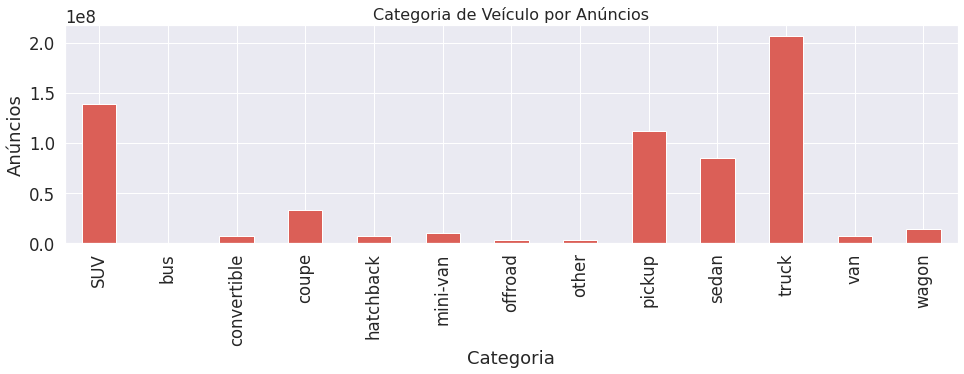

In [60]:
# Tipos de veículos com a maior soma de preço negociados
display(df_standard.pivot_table(index='type', values='price', aggfunc='sum').sort_values(by=['price'], ascending=False).T)

# Gráfico do parâmetro 'type' e 'price'
plt.figure(figsize = ((16, 4)))
df.groupby('type')['price'].sum().plot(kind='bar')
plt.title(f'Categoria de Veículo por Anúncios', fontsize = 16)
plt.ylabel('Anúncios')
plt.xlabel('Categoria')
plt.xticks(rotation = 90);

A categoria `truck` e `SUV` são as duas com maiores montantes de preço anunciados pela plataforma, com mais de 167 e 124 milhões de dólares, respectivamente. O preço médio da categoria `truck` é 15217.24 dólares, enquanto a categoria `SUV` possui um preço médio de 10484.35 dólares.

## Fatores de preço

Agora veremos os fatores que mais afetam o preço nos anúncios dos veículos.

In [61]:
# Matriz de correlação
display(df_standard.corr())

,price,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,vehicle_age_year,odometer_year
price,1.000000,0.314041,-0.406567,0.332881,-0.001580,0.005544,-0.007402,-0.510409,0.008359
cylinders,0.314041,1.000000,0.111600,0.413400,0.002646,-0.001063,0.001473,0.149942,-0.000232
odometer,-0.406567,0.111600,1.000000,0.056784,0.006032,-0.009053,0.013347,0.529966,-0.002256
is_4wd,0.332881,0.413400,0.056784,1.000000,0.002533,-0.002410,0.003282,0.017971,0.001898
days_listed,-0.001580,0.002646,0.006032,0.002533,1.000000,0.011549,-0.011560,0.003963,-0.007133
year_posted,0.005544,-0.001063,-0.009053,-0.002410,0.011549,1.000000,-0.817811,0.031774,0.010101
month_posted,-0.007402,0.001473,0.013347,0.003282,-0.011560,-0.817811,1.000000,-0.002610,-0.010910
vehicle_age_year,-0.510409,0.149942,0.529966,0.017971,0.003963,0.031774,-0.002610,1.000000,-0.011926
odometer_year,0.008359,-0.000232,-0.002256,0.001898,-0.007133,0.010101,-0.010910,-0.011926,1.000000


A matriz de correlação traz as principais variáveis que afetam o preço. A idade do veículo (`vehicle_age_year`) e a quilometragem (`odometer`) possuem as maiores correlações com preço, porém correlações negativas — como realmente deveria ser, pois veículos com mais anos e maiores quilometragens normalmente possuem os menores preços de venda. Já a quantidade de cilindros (`cylinders`) e o fato do carro ser 4x4 ou não (`is_4wd`), afetam positivamente o preço de venda do carro.

Adiante vê-se o comportamento gráfico dessas variáveis.

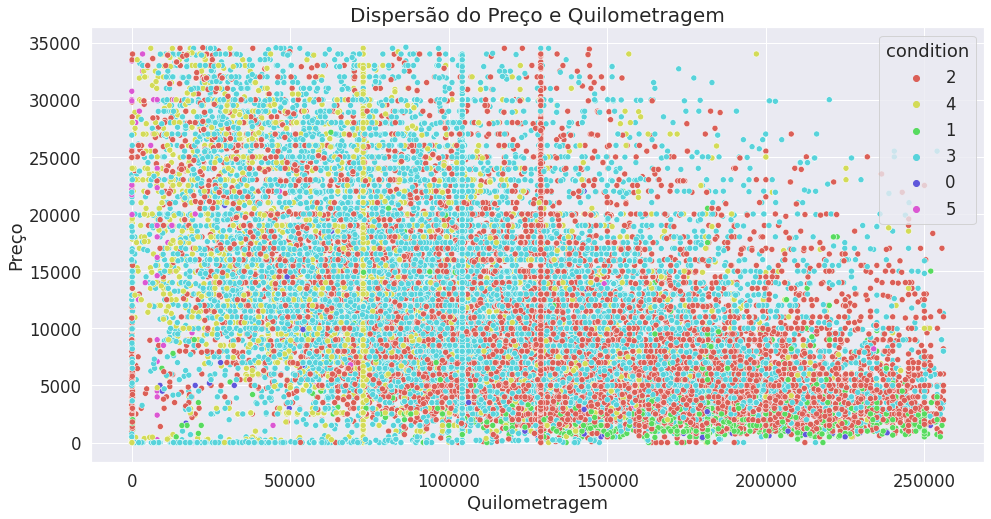

In [62]:
# Gráfico de dispersão 'price' e 'odometer' com 'condition'
plt.figure(figsize = ((16, 8)))
sns.scatterplot(data=df_standard, x="odometer", y="price", hue='condition', legend="full")
plt.title(f'Dispersão do Preço e Quilometragem', fontsize = 20)
plt.ylabel('Preço')
plt.xlabel('Quilometragem')
plt.xticks(rotation = 0);

Conforme a matriz de correlação, temos correlação negativa relevante entre o preço do veículo e a quantidade de sua quilometragem. No gráfico de dispersão é possível ver a massa de dados decaíndo conforme há o aumento da quilometragem dos veículos.

Veículos tidos como novos (new), condição 5, estão concentrados próximos do eixo Y, com baixas quilometragens e com variação no preço ao longo do eixo Y. Já os veículos com excelentes condições (condição 3 e 4) estão distribuídos, em sua maioria, na zona que abrange os intervalos até a quilometragem de 125000km e o preço de 35 mil dólares. Apesar de existir veículos com condições inferiores (condições 1 e 2) por todo o gráfico de dispersão, é visível uma maior concentração deles quando a quilometragem passa dos 125000km, principalmente a condição 1, concentrada ao longo do eixo X, no qual possui os menores preços e as maiores quilometragens.

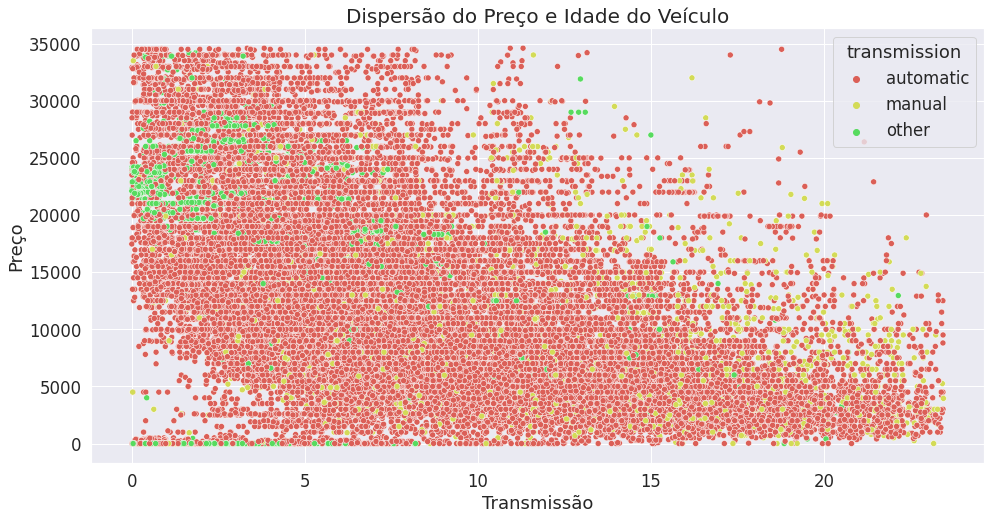

In [63]:
# Gráfico de dispersão 'price' e 'vehicle_age_year' com 'transmission'
plt.figure(figsize = ((16, 8)))
sns.scatterplot(data=df_standard, x="vehicle_age_year", y="price", hue='transmission', legend="full")
plt.title(f'Dispersão do Preço e Idade do Veículo', fontsize = 20)
plt.ylabel('Preço')
plt.xlabel('Transmissão')
plt.xticks(rotation = 0);

Como a idade do veículo (`vehicle_age_year`) em anos possui uma correlação negativa com o preço do veículo, temos que para grandes valores na idade do veículo encontremos também baixos valores na variável preço. Veículos mais antigos, tendem a serem mais baratos. Há uma predominância de veículos com transmissão automática nos anúncios publicados, bem como se revela uma concentração maior de transmissão manual em veículos mais antigos — um reflexo do mercado de automóveis na região de estudo.

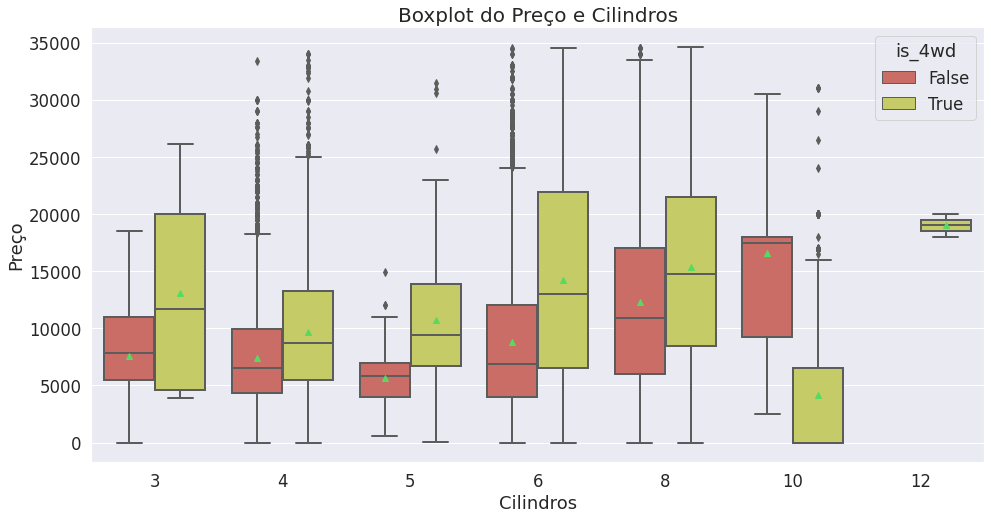

In [64]:
# Gráfico de dispersão 'price' e 'cylinders' com 'is_4wd'
plt.figure(figsize = ((16, 8)))
sns.boxplot(data=df_standard, x="cylinders", y="price", hue='is_4wd', showmeans=True)
plt.title(f'Boxplot do Preço e Cilindros', fontsize = 20)
plt.ylabel('Preço')
plt.xlabel('Cilindros')
plt.xticks(rotation = 0);

O gráfico de boxplot acima revela que veículos com a característica 4x4 possuem em média maiores preços de venda que os veículos sem essa característica. Os veículos com quantidade de cilindros típicos, 6 ou 8, possuem maiores intervalos de preço entre preços mínimos e máximos.

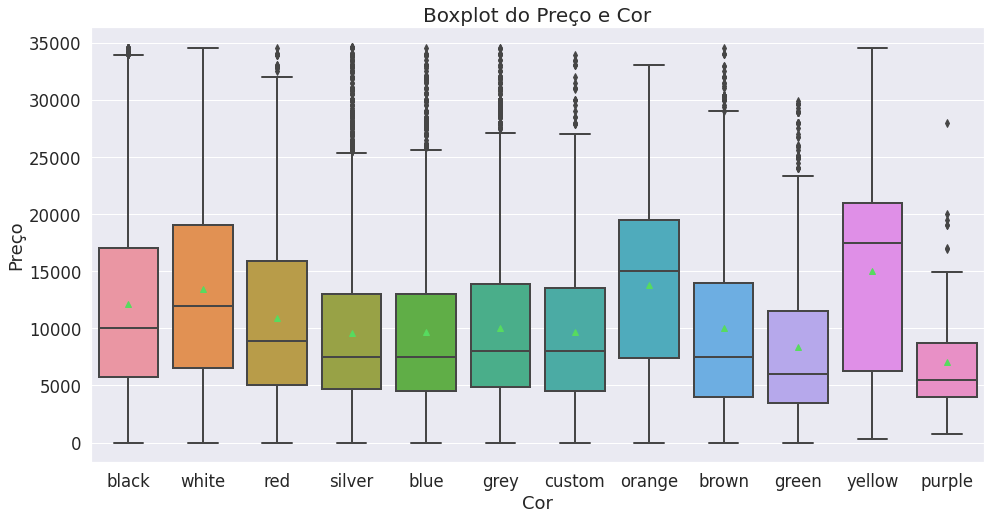

In [65]:
# Gráfico de dispersão 'price' e 'paint_color'
plt.figure(figsize = ((16, 8)))
sns.boxplot(data=df_standard, x="paint_color", y="price", showmeans=True)
plt.title(f'Boxplot do Preço e Cor', fontsize = 20)
plt.ylabel('Preço')
plt.xlabel('Cor')
plt.xticks(rotation = 0);

Conforme estudo de 2017 e reestudo de 2022 realizado pelo site de anúncio de vendas de carros *iSeeCars*, as cores mais neutras costumam ser mais demandadas pelos consumidores, logo acabam por afetar o preço dos carros. O estudo também ressalta que a cor amarela (yellow) é bem procurada em carros de luxo e carros *premiums*.

Percebam que a cor roxa (purple) possui a menor mediana em relação ao preço, em contrapartida as cores branca (white) e preto (black) com um das maiores médias. Atenção para a cor laranja (orange), essa cor pode sugerir uma similaridade com a cor amarela (yellow) e ter seus preços acrescido pela procura dos consumidores, ou até mesmo ser a cor predominante no tipo de veículo ônibus (bus) que tipicamente possui preços bem mais elevados que os outros tipos de veículos.

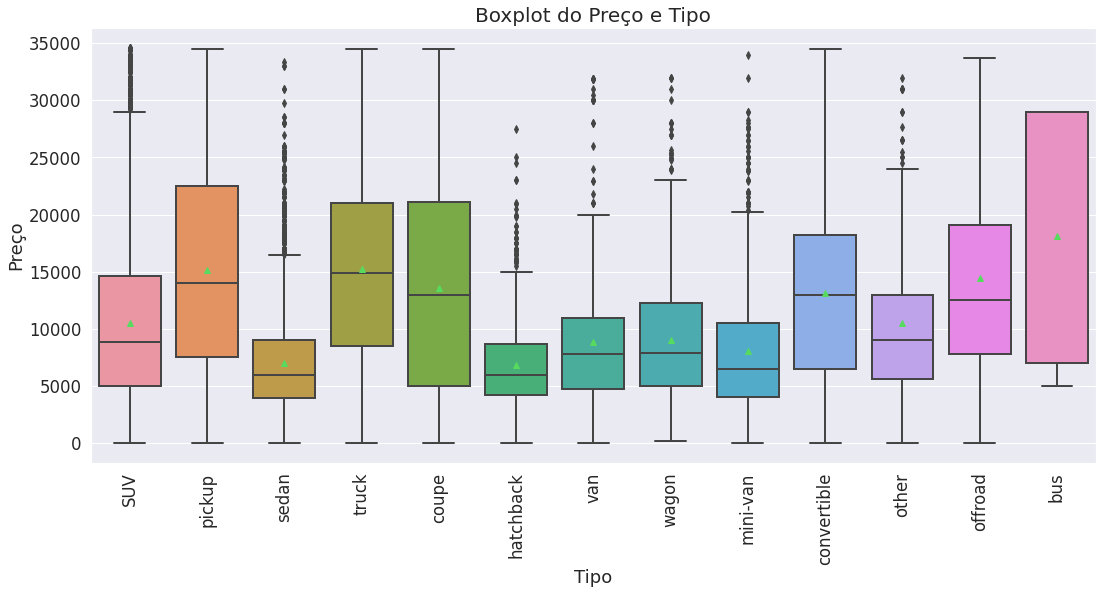

In [66]:
# Gráfico de dispersão 'price' e 'type'
plt.figure(figsize = ((18, 8)))
sns.boxplot(data=df_standard, x="type", y="price", showmeans=True)
plt.title(f'Boxplot do Preço e Tipo', fontsize = 20)
plt.ylabel('Preço')
plt.xlabel('Tipo')
plt.xticks(rotation = 90);

Os maiores preços médios estão com o tipo de veículo ônibus (bus), algo comum por se tratarem de veículos de maior porte e de caráter comercial. Muitos veículos anunciados com preços atípicos, acabam por puxar quase todas as médias de preço dos tipos de veículos para acima das suas respectivas medianas.

## Conclusão geral

Após as análises iniciais do DataFrame, foram feitas correções ao nível de duplicatas implícitas e de tipo dos dados.

A existência de valores ausentes levou a procura por preenchê-los da melhor maneira possível. Após verificar que nenhuma característica era responsável por dominar a existência de valores ausentes nos dados, foi iniciado o preenchimento da variável `cylinders` utilizando o modelo do veículo, uma vez que a fabricação do veículo define a quantidade de cilindros que aquele modelo de motor vai ter. O ano do modelo, variável `model_year`, foi preenchido com auxílio da variável `model`, já que os modelos dos veículos definem, com bastante precisão, o ano em que aqueles veículos foram fabricados.

Os valores ausentes na quilometragem, variável `odometer`, foram preenchidos de acordo com o estado de conservação do veículo, uma vez que veículos mal conservados costumam ter alta quilometragem, ao nível que veículos mais bem conservados possuem os menores valores de quilometragens.

A variável `is_4wd` foi identificada como *boolean* com valores zero (0) ausentes, assim foi relativamente simples preencher/trocar os valores faltantes por zero.

Já a variável da cor do veículo, `paint_color`, foi a mais complexa para realizar seu preenchimento, uma vez que estudos comprovam que a cor do veículo afeta o seu preço de venda — principal objetivo desse estudo. Nesse sentido, e de forma a ser razoável com o preenchimento, foi escolhido a cor que mais se repetia entre os mesmo modelos de veículos, a moda (frequência).

Uma outra análise que foi realizada foi o tratamento dos valores atípicos. A criação dos intervalos interquartis (IQR) foram imprescindíveis para identificar e tratar esses valores da base de dados.

Em seguida foram analisados o novo DataFrame através de gráficos de histograma e bloxpot, com e sem sobreposição, e criação de linhas de limites inferiores e superiores. Nessa etapa os gráficos se mostraram mais claros e perceptíveis, com a ausência dos valores extremos.

Verificou-se o tempo médio de existência da publicação dos anúncios, que são de 39.5 dias. Além de identificarmos os anúncios que foram removidos em menos de um dia de publicados. Já por outro lado, os anúncios mais demorados foram os que superaram 104 dias de publicação.

Foi identificado também que as categorias truck e SUV são as duas com maiores montantes de preço anunciados pela plataforma, com mais de 167 e 124 milhões de dólares, respectivamente. O preço médio da categoria truck ultrapassa 15 mil dólares, enquanto a categoria SUV possui um preço médio superior a 10 mil dólares.

Por fim, a matriz de correlação lançou luz sobre as principais variáveis que afetam o preço dos veículos nos anúncios. Nas quais, as principais foram a idade do veículo, quilometragem, quantidade de cilindros e se o carro possui ou não a característica 4x4.

Com a utilização de gráficos de dispersão, bem como boxplots, foi possível corroborar coms os estudos da iSeeCars que identificam que veículos com certas cores são mais caros que outros. Além de reforçar que veículos em melhores condições de conservação tendem a atingirem maiores preços nos anúncios.

### Referência

* iSeeCars — acesso em 20 de dezembro de 2022, em: https://www.iseecars.com/most-popular-car-colors-study#v=2022.